20230619 = Apenas treinamento, crossover + semantica, 100k avaliações, 500 população, <uop> com tudo

standard

In [33]:
import os
import glob
import pandas as pd
import plot as plot
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import numpy as np
import scipy

import shutil

import warnings
warnings.filterwarnings("ignore")

In [34]:
dfs = []

# Set the root directory where you want to search for "res.csv"
root_directories = ['fs/results']  # Replace with your directory path

for root_directory in root_directories:
    # Use the glob module to find all files named "res.csv" recursively
    csv_files = glob.glob(os.path.join(root_directory, '**', 'res.csv'), recursive=True)

    # Print the paths of all found "res.csv" files
    for file in csv_files:
        # print(file)
        df = pd.read_csv(file, sep = ";", header=None)
        # print(df)
        df.columns = ["seed", "time", "training", "test", "validation", "model"]

        # fs/results/f11/500/original/SC1-GGP/res.csv
        
        df['constants']   = [file.split('/')[2] for i in range(len(df))]
        df['problem']   = [file.split('/')[2] for i in range(len(df))]
        df['amount']    = [file.split('/')[3] for i in range(len(df))]
        df['noise']     = [file.split('/')[4] for i in range(len(df))]
        df['distance']  = [file.split('/')[5] for i in range(len(df))]
        df['variation'] = [file.split('/')[6] for i in range(len(df))]
        df['lower']     = [file.split('/')[7] for i in range(len(df))]
        df['upper']     = [file.split('/')[8] for i in range(len(df))]
        df['seed_file'] = [str(seed) + '.hist' for seed in df.seed]
        
        # print(file)
        dfs.append(df)
            
results = pd.concat(dfs)
results.columns = ['seed' , 'time', 'training', 'test', 'validation', 'model', 'constants', 'problem', 'amount', 'noise', 'distance', 'variation', 'lower', 'upper', 'seed_file']
results["training"] = pd.to_numeric(results["training"])
results["test"] = pd.to_numeric(results["test"])
results["validation"] = pd.to_numeric(results["validation"])
results["lower"] = pd.to_numeric(results["lower"])
results["upper"] = pd.to_numeric(results["upper"])
results = results.reset_index(drop=True)
results

,seed,time,training,test,validation,model,constants,problem,amount,noise,distance,variation,lower,upper,seed_file
0,0,1055,0.403972,0.288387,0.256372,f0() = (0.2563721739) x3 ln x2 exp exp + sq...,f4,f4,100,noise,ABS,RSC,0.100,10.00,0.hist
1,1,724,0.401545,0.283727,0.237634,f0() = (0.2376336381) 0.8 exp sqrt,f4,f4,100,noise,ABS,RSC,0.100,10.00,1.hist
2,2,1074,0.400742,0.283711,0.242580,f0() = (0.2425797814) 0.4 sin sin exp,f4,f4,100,noise,ABS,RSC,0.100,10.00,2.hist
3,0,1219,0.402201,0.284124,0.236407,f0() = (0.2364074004) -0.9 exp exp,f4,f4,100,noise,ABS,RSC,0.100,1.00,0.hist
4,1,1262,0.401545,0.283727,0.237634,f0() = (0.2376336381) 0.4 exp,f4,f4,100,noise,ABS,RSC,0.100,1.00,1.hist
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5035,1,659,6.290694,4.846818,6.696094,f0() = (6.696093506) x1 x2 + sin,f1,f1,50,original,COS,SSC,0.001,0.10,1.hist
5036,2,619,10.670303,5.297581,9.679409,f0() = (9.679408698) x2 x2 x1 * exp x2 * 0....,f1,f1,50,original,COS,SSC,0.001,0.10,2.hist
5037,0,928,6.290694,4.846818,6.696094,f0() = (6.696093506) x1 x2 + sin,f1,f1,50,original,COS,SSC,0.001,0.01,0.hist
5038,1,785,6.290694,4.846818,6.696094,f0() = (6.696093506) x1 x2 + sin,f1,f1,50,original,COS,SSC,0.001,0.01,1.hist


In [35]:
results = results.drop_duplicates(subset=["problem", "amount", "noise", "distance", "variation", 'lower', 'upper', "seed"])
results

,seed,time,training,test,validation,model,constants,problem,amount,noise,distance,variation,lower,upper,seed_file
0,0,1055,0.403972,0.288387,0.256372,f0() = (0.2563721739) x3 ln x2 exp exp + sq...,f4,f4,100,noise,ABS,RSC,0.100,10.00,0.hist
1,1,724,0.401545,0.283727,0.237634,f0() = (0.2376336381) 0.8 exp sqrt,f4,f4,100,noise,ABS,RSC,0.100,10.00,1.hist
2,2,1074,0.400742,0.283711,0.242580,f0() = (0.2425797814) 0.4 sin sin exp,f4,f4,100,noise,ABS,RSC,0.100,10.00,2.hist
3,0,1219,0.402201,0.284124,0.236407,f0() = (0.2364074004) -0.9 exp exp,f4,f4,100,noise,ABS,RSC,0.100,1.00,0.hist
4,1,1262,0.401545,0.283727,0.237634,f0() = (0.2376336381) 0.4 exp,f4,f4,100,noise,ABS,RSC,0.100,1.00,1.hist
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5035,1,659,6.290694,4.846818,6.696094,f0() = (6.696093506) x1 x2 + sin,f1,f1,50,original,COS,SSC,0.001,0.10,1.hist
5036,2,619,10.670303,5.297581,9.679409,f0() = (9.679408698) x2 x2 x1 * exp x2 * 0....,f1,f1,50,original,COS,SSC,0.001,0.10,2.hist
5037,0,928,6.290694,4.846818,6.696094,f0() = (6.696093506) x1 x2 + sin,f1,f1,50,original,COS,SSC,0.001,0.01,0.hist
5038,1,785,6.290694,4.846818,6.696094,f0() = (6.696093506) x1 x2 + sin,f1,f1,50,original,COS,SSC,0.001,0.01,1.hist


In [36]:
results.to_json("fs/results/results.json")

In [37]:
# results = pd.read_json("fs/results/results.json")
# results

In [38]:
results.replace(np.nan, np.inf, inplace=True)

In [39]:
# results = results[results.seed < 1]

In [40]:
print(results.problem.unique(), "=", len(results.problem.unique()))
print(results.amount.unique())  
print(results.noise.unique())  
print(results.variation.unique())  
print(results.distance.unique())   
print(results.lower.unique())   
print(results.upper.unique())

['f4' 'f14' 'f3' 'f12' 'f1'] = 5
['100' '50']
['noise' 'original']
['RSC' 'SAC' 'FVSC' 'DEF' 'SCPS' 'SSC']
['ABS' 'COS']
[1.e-01 1.e-02 1.e+00 1.e-03 0.e+00 1.e-05 1.e-04]
[1.e+01 1.e+00 1.e-01 1.e-02 1.e-04 1.e-03]


In [41]:
fit_model = 'training'

In [42]:
grouped = results.groupby(
    ['problem', 'amount', 'noise', 'distance', 'variation', 'lower', 'upper'], 
    as_index=False
).agg(
    {fit_model: ['count', 'min', 'mean', 'median', 'max', 'std']}
)

grouped

problem amount     noise distance variation   lower  upper training  \
                                                                   count   
0         f1    100     noise      ABS       DEF  0.0000   1.00        3   
1         f1    100     noise      ABS      FVSC  0.0010   0.01        3   
2         f1    100     noise      ABS      FVSC  0.0010   0.10        3   
3         f1    100     noise      ABS      FVSC  0.0010   1.00        3   
4         f1    100     noise      ABS      FVSC  0.0010  10.00        3   
...      ...    ...       ...      ...       ...     ...    ...      ...   
1675      f4     50  original      COS       SSC  0.0001   0.01        3   
1676      f4     50  original      COS       SSC  0.0001   0.10        3   
1677      f4     50  original      COS       SSC  0.0010   0.01        3   
1678      f4     50  original      COS       SSC  0.0010   0.10        3   
1679      f4     50  original      COS       SSC  0.0100   0.10        3   

                                                        
           min      mean    median       max       std  
0     4.924284  5.406773  4.924284  6.371749  0.835694  
1     6.176322  6.331359  6.176322  6.641432  0.268531  
2     6.176322  6.331359  6.176322  6.641432  0.268531  
3     6.176322  6.331359  6.176322  6.641432  0.268531  
4     6.176322  6.241464  6.176322  6.371749  0.112830  
...        ...       ...       ...       ...       ...  
1675  0.242241  0.252474  0.257591  0.257591  0.008862  
1676  0.242241  0.252474  0.257591  0.257591  0.008862  
1677  0.240086  0.240804  0.240086  0.242241  0.001244  
1678  0.242241  0.252474  0.257591  0.257591  0.008862  
1679  0.242241  0.252474  0.257591  0.257591  0.008862  

[1680 rows x 13 columns]

In [43]:
grouped['minimum'] = grouped[fit_model]['median']

# Gerar os PP

In [44]:
grouped = grouped.sort_values(by="problem")

In [45]:
pp_dfs = {}

for distance in grouped.distance.unique():
    pp_dfs[distance] = {}
    
    d_df = grouped[grouped.distance == distance]
    for noise in d_df.noise.unique():
        # print(distance, noise)
        pp_dfs[distance][noise] = {}
        n_d_df = d_df[(d_df.noise == noise)]
        for amount in n_d_df.amount.unique():
            # print(distance, noise, amount)
            pp_dfs[distance][noise][amount] = {}
            a_n_d_df = n_d_df[(n_d_df.amount == amount)]
            for variation in a_n_d_df.variation.unique():
                # print(distance, noise, amount, variation)
                pp_dfs[distance][noise][amount][variation] = {}
                v_a_n_d_df = a_n_d_df[(a_n_d_df.variation == variation)]
                for lower in v_a_n_d_df.lower.unique():
                    l_v_a_n_d_df = v_a_n_d_df[(v_a_n_d_df.lower == lower)]
                    for upper in l_v_a_n_d_df.upper.unique():
                        u_l_v_a_n_d_df = l_v_a_n_d_df[(l_v_a_n_d_df.upper == upper)]
                        if lower < upper:
                            # print(distance, noise, amount, variation, lower, upper)
                            #seleciona os resultados para um
                            vet = u_l_v_a_n_d_df.sort_values(by=(fit_model, "median"))
                            
                            vet.index = (vet.problem.values)
                            
                            if len(vet):
                                pp_dfs[distance][noise][amount][variation][(lower, upper)] = vet[(fit_model, "median")]

                pp_dfs[distance][noise][amount][variation]["df"] = pd.DataFrame(pp_dfs[distance][noise][amount][variation])
                pp_dfs[distance][noise][amount][variation]["df"] = pp_dfs[distance][noise][amount][variation]["df"].div(pp_dfs[distance][noise][amount][variation]["df"].min(axis=1), axis=0)

In [46]:
areas_df = []
pp_df = []

for distance in pp_dfs:
    for noise in pp_dfs[distance]:
        for amount in pp_dfs[distance][noise]:
            for v, variation in enumerate(pp_dfs[distance][noise][amount]):
                resume = pp_dfs[distance][noise][amount][variation]["df"]
                
                # Gráficos

                vet = []
                names = resume.columns

                for key in names:      
                    resume_ = np.array(resume[key])
                    resume_ = np.sort(resume_)
                    
                    h = 1. / len(resume)
                    linha = [[1, 0]]

                    for i in resume_:
                        linha.append([i, linha[-1][1]])
                        linha.append([i, linha[-1][1] + h])

                    linha = np.array(linha).T
                    # print(linha)
                    vet.append(linha[0,:])
                vet = np.array(vet).T
                maior = np.max(vet)
                maior = [[maior for _ in range(len(names))]]
                vet = np.concatenate([vet, np.array(maior)])
                
                vet = pd.DataFrame(vet)

                vet.columns = names
                vet['h'] = [h*(i//2) for i in range(len(vet))]
                                
                # Calcula as áreas
                areas = {}
                for i in range(len(names)):
                    areas[names[i]] = np.trapz(vet['h'], vet[names[i]])
                
                for i in range(len(names)):
                    areas[names[i]] = areas[names[i]] / max(areas.values())
                    areas_df.append({
                        "distance": distance,
                        "noise": noise,
                        "amount": amount,
                        "variation": variation,
                        "parameters": names[i],
                        "area": areas[names[i]]
                    })
                    
                    # print({
                    #     "distance": distance,
                    #     "noise": noise,
                    #     "amount": amount,
                    #     "variation": variation,
                    #     "parameters": names[i],
                    #     "area": areas[names[i]]
                    # })
                    
                pp_dfs[distance][noise][amount][variation]["vet"] = vet

In [47]:
areas_df = pd.DataFrame(areas_df)
areas_df

,distance,noise,amount,variation,parameters,area
0,ABS,noise,100,DEF,"(0.0, 1.0)",NaN
1,ABS,noise,100,SSC,"(1.0, 10.0)",0.939126
2,ABS,noise,100,SSC,"(0.1, 10.0)",0.800720
3,ABS,noise,100,SSC,"(0.1, 1.0)",0.780694
4,ABS,noise,100,SSC,"(0.01, 10.0)",0.802547
...,...,...,...,...,...,...
331,COS,original,100,SAC,"(0.001, 0.01)",NaN
332,COS,original,100,SAC,"(0.0001, 0.1)",NaN
333,COS,original,100,SAC,"(0.0001, 0.01)",NaN
334,COS,original,100,SAC,"(0.0001, 0.001)",NaN


DEF


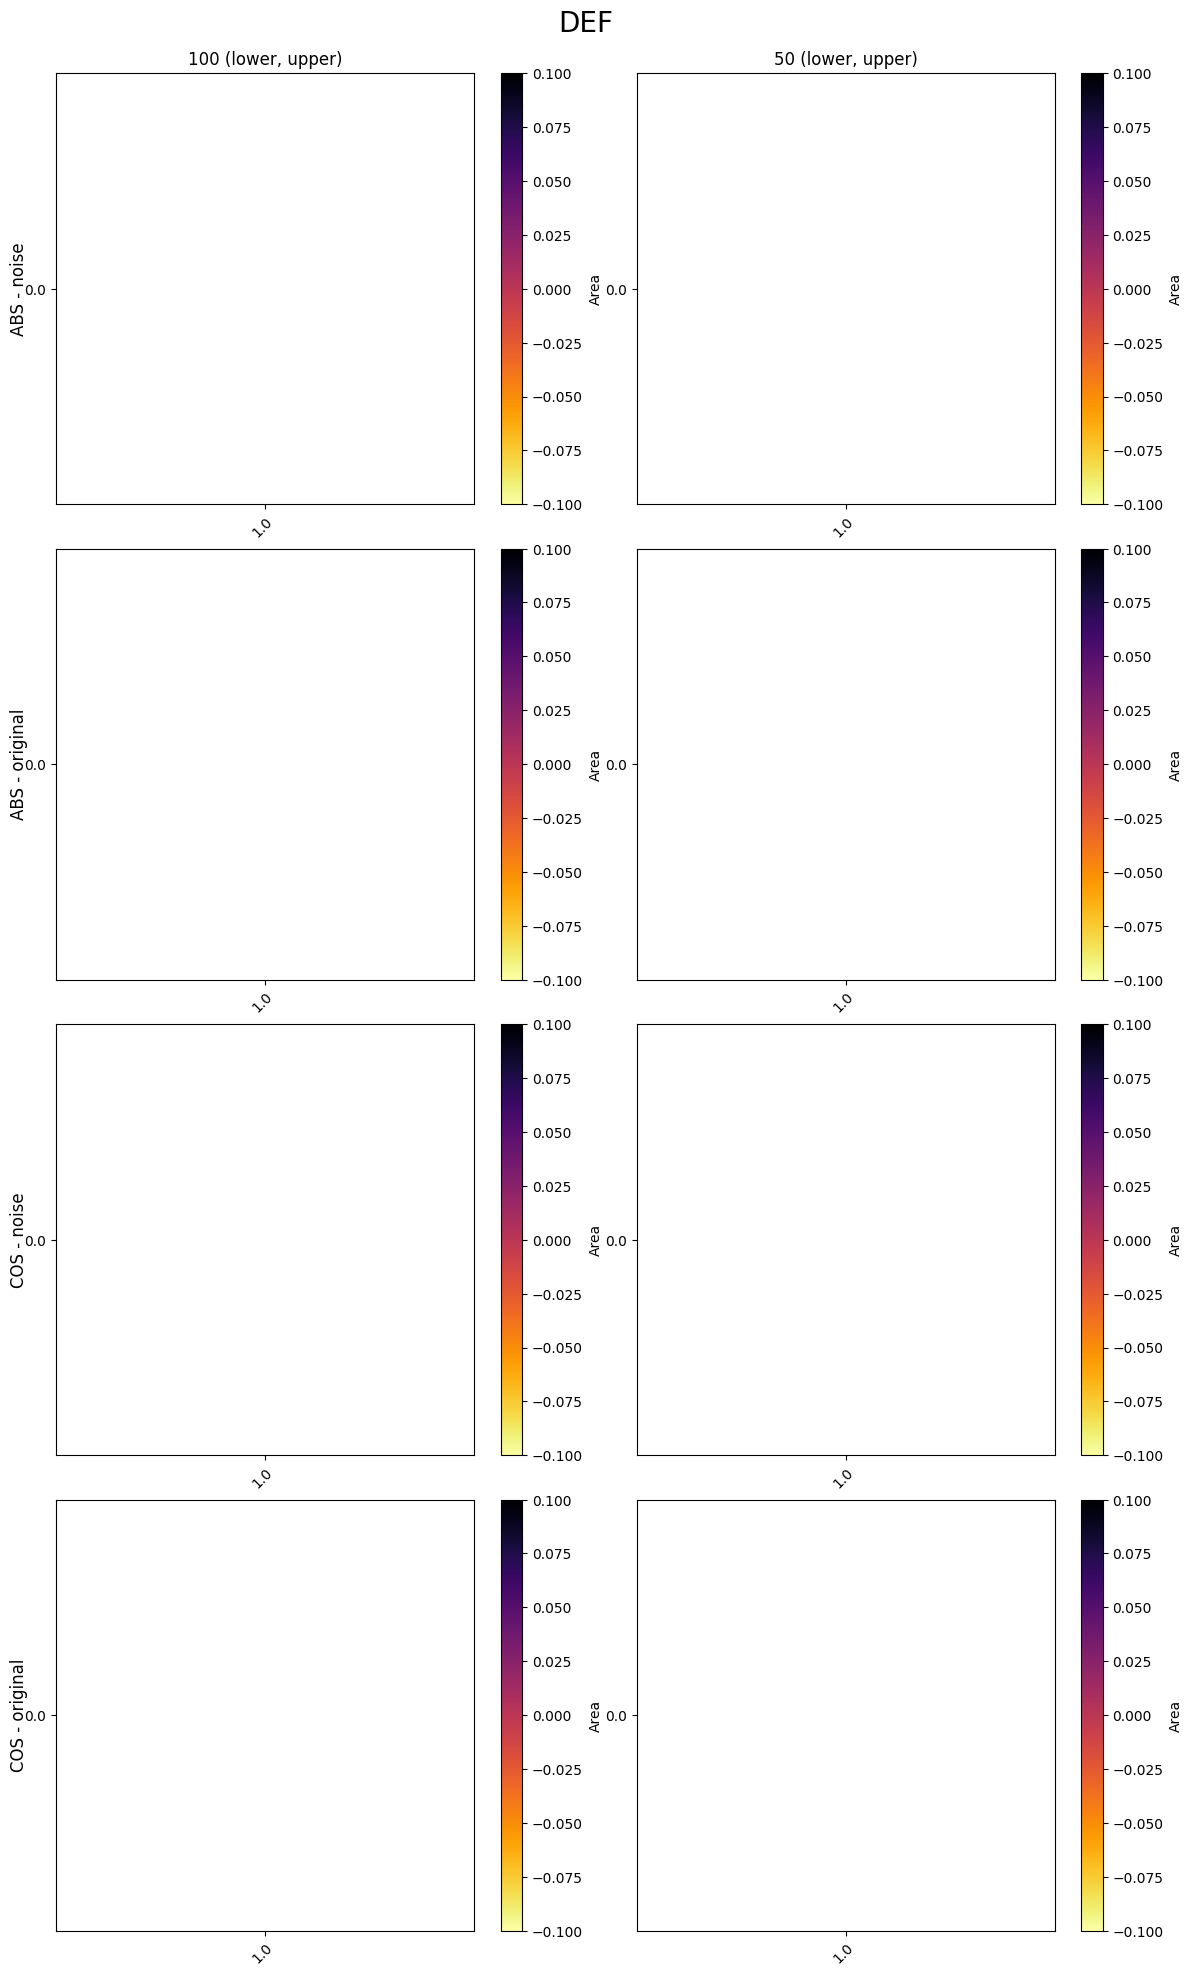

SSC


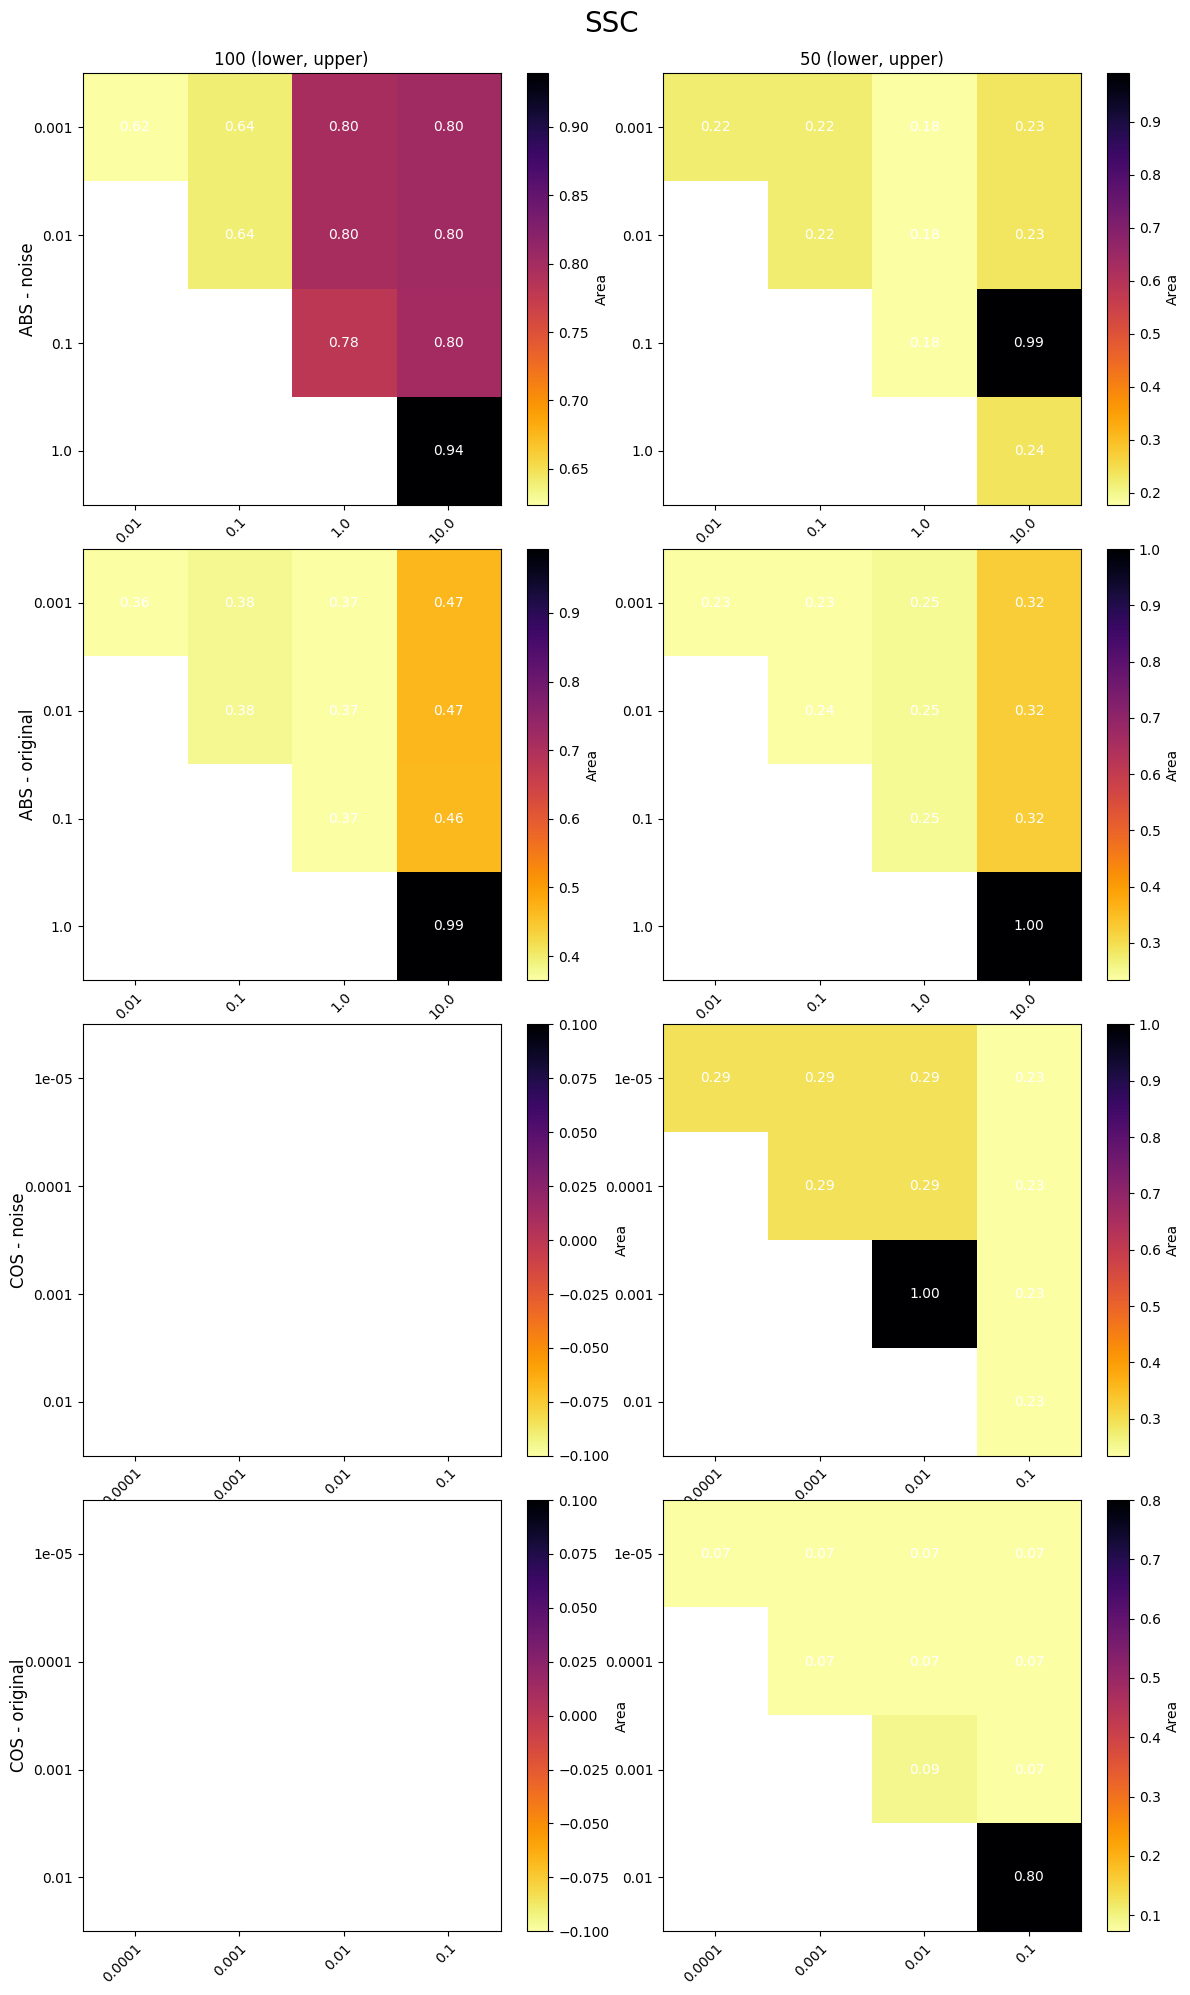

RSC


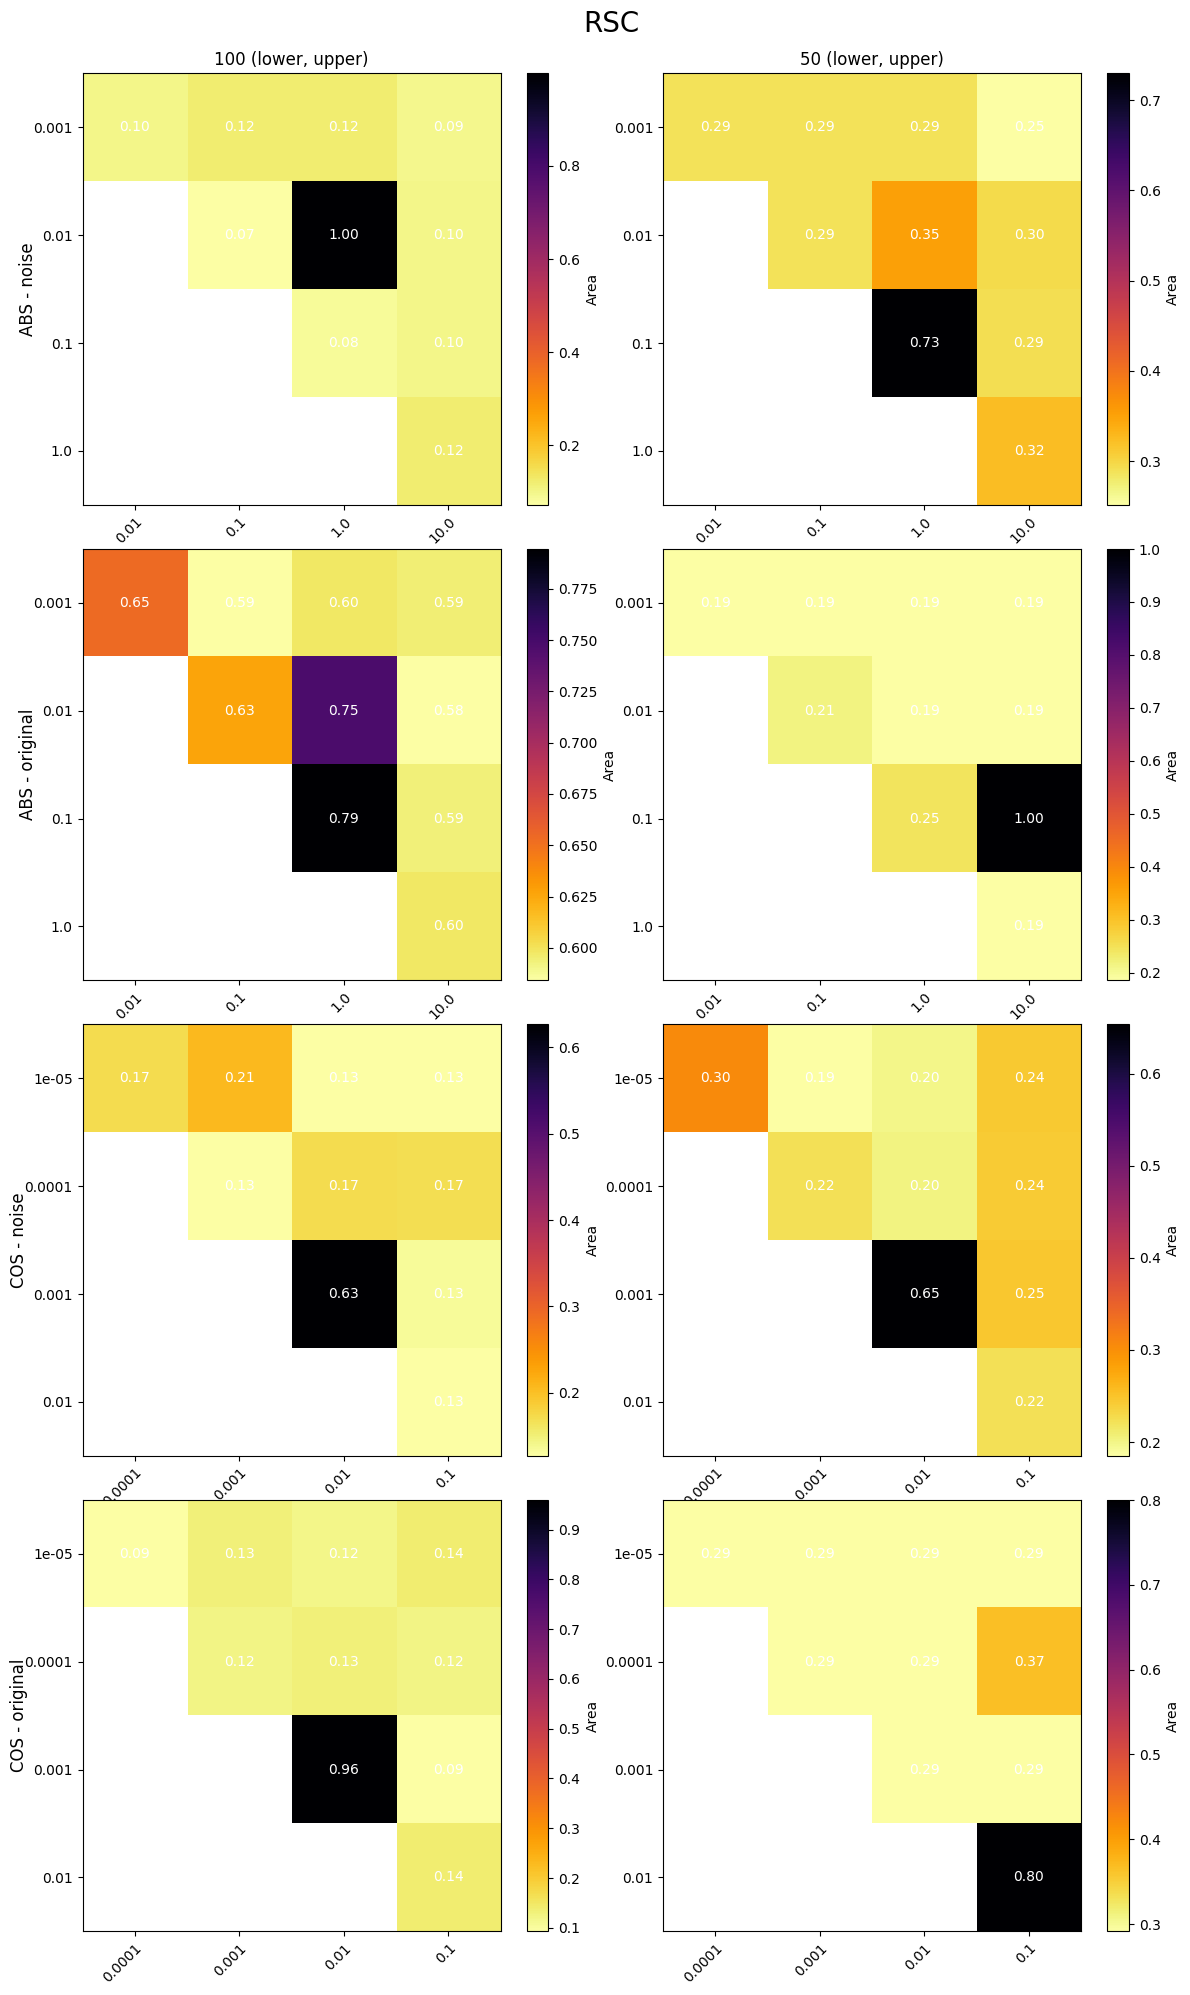

FVSC


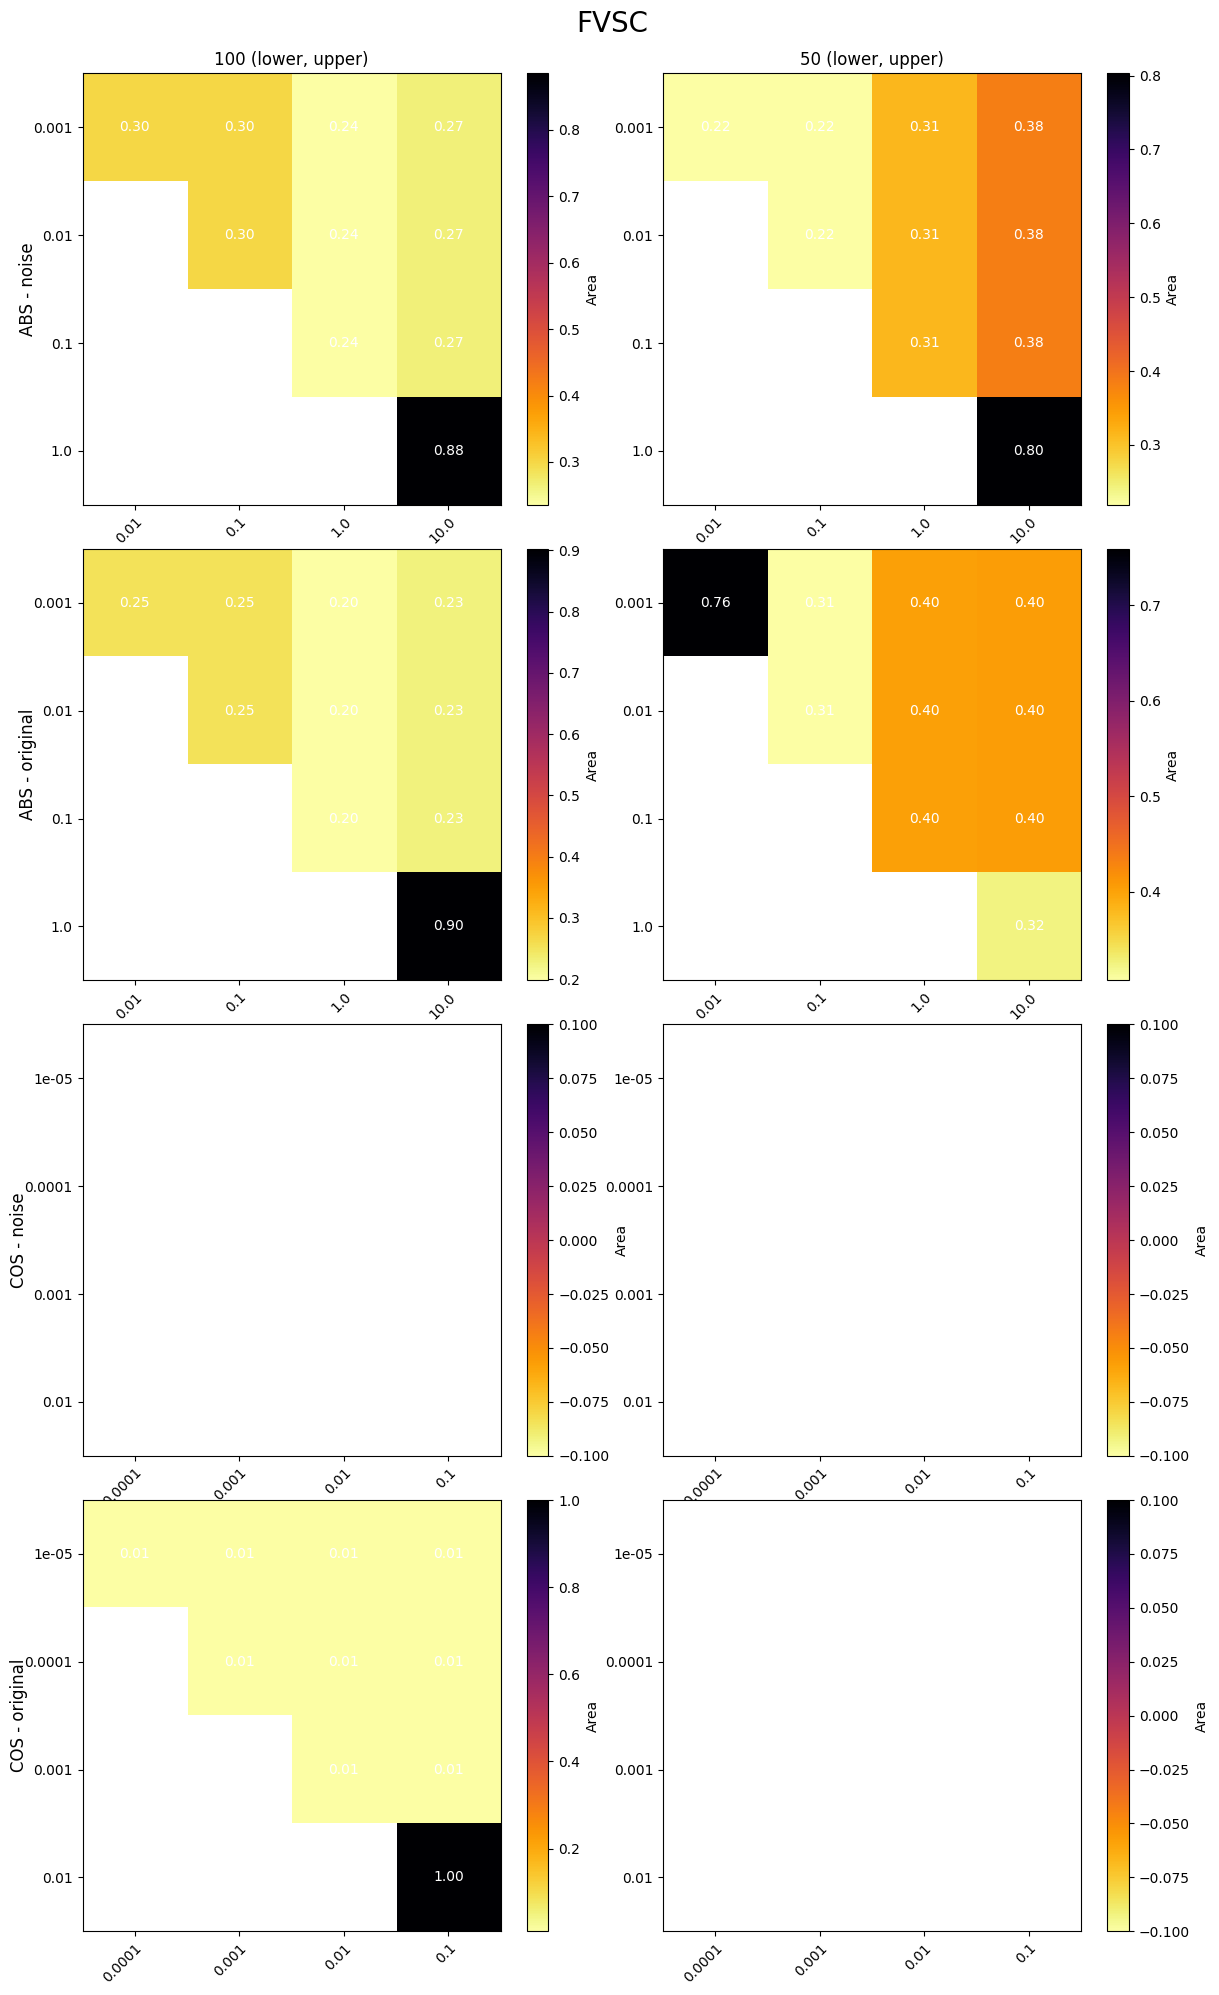

SCPS


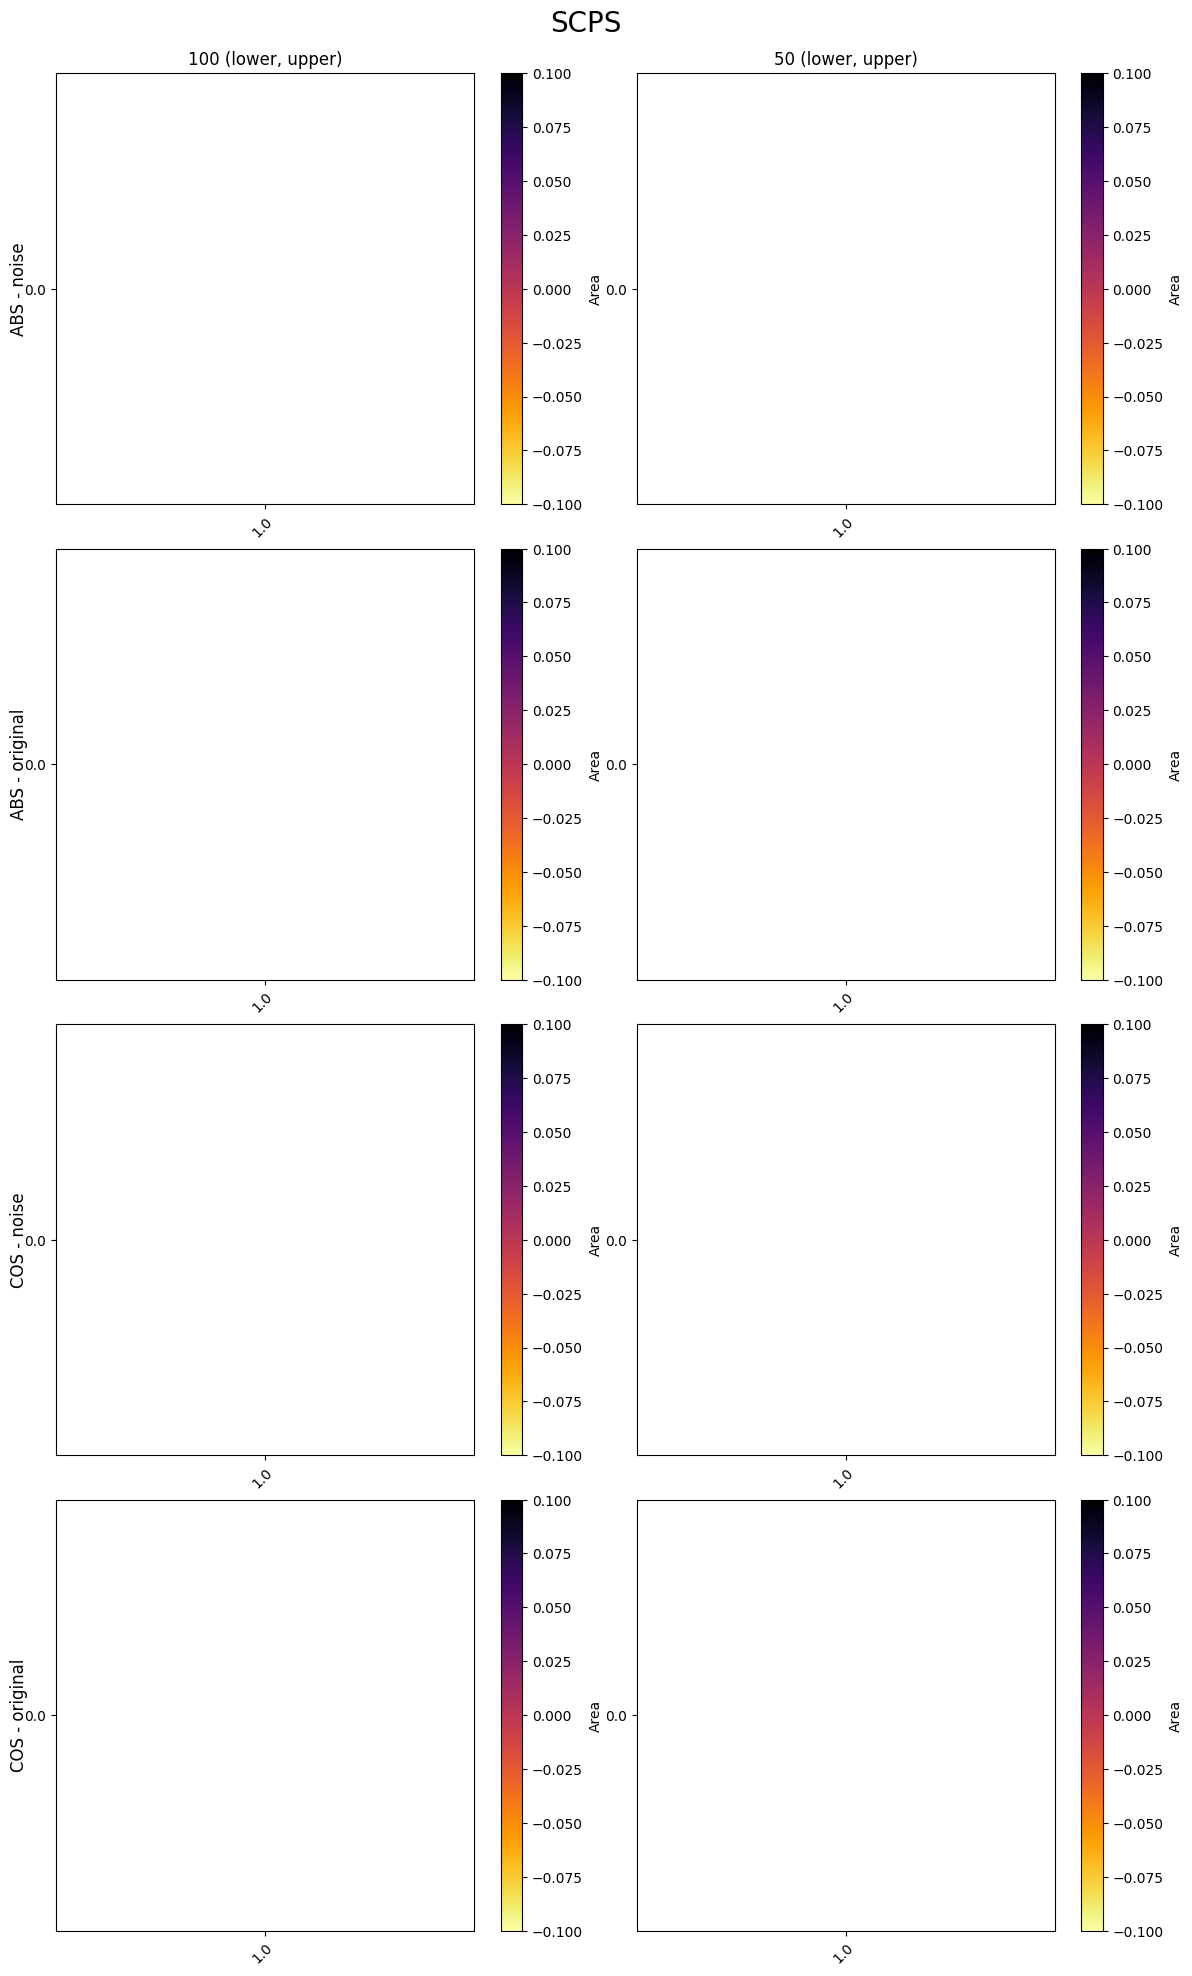

SAC


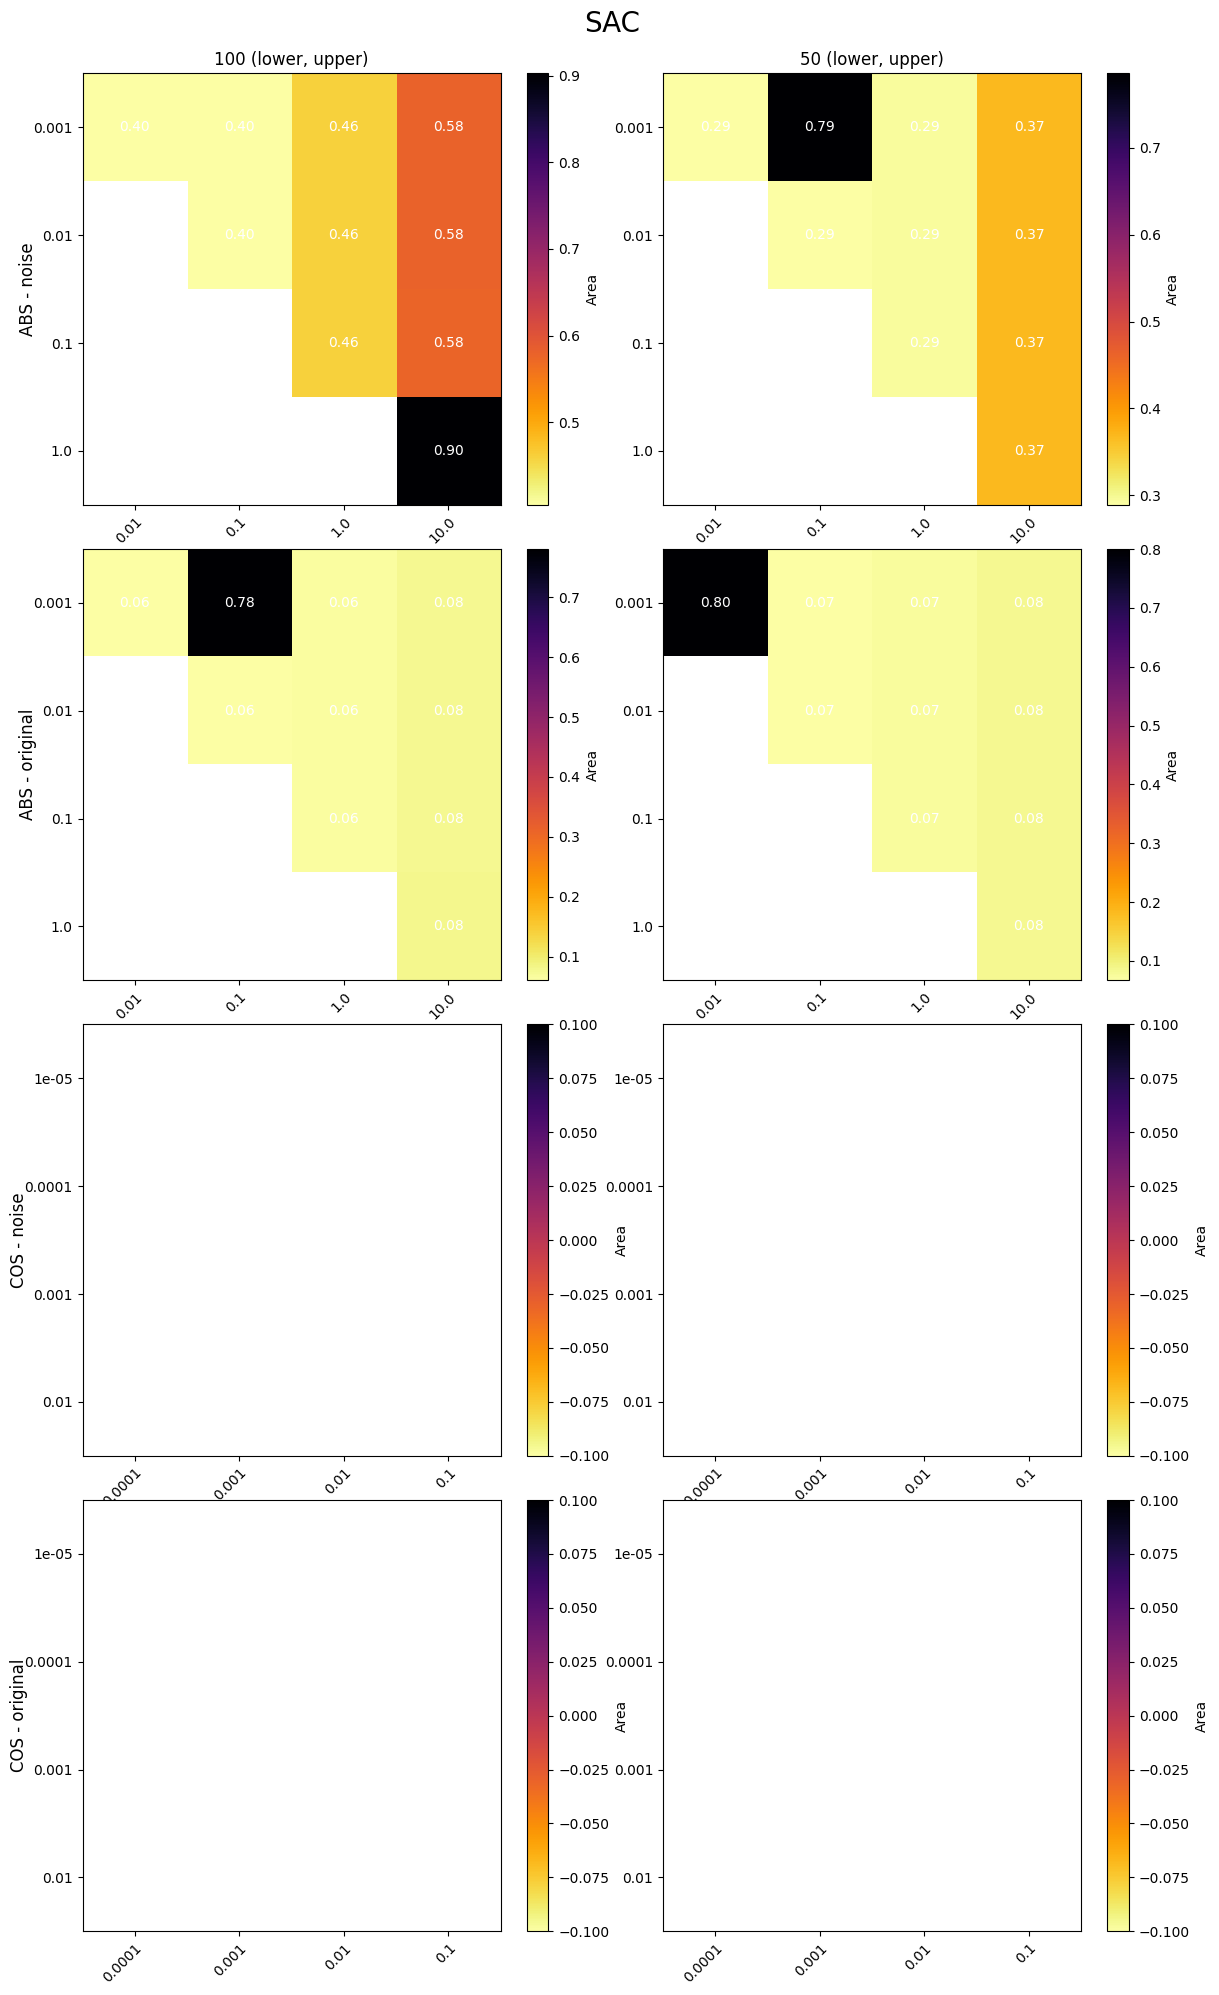

In [48]:
for variation in areas_df.variation.unique():
    print(variation)
    distances = areas_df[areas_df.variation == variation].distance.unique()
    noises = areas_df[areas_df.variation == variation].noise.unique()
    amounts = areas_df[areas_df.variation == variation].amount.unique()
    
    n_rows = len(distances) * len(noises)
    n_cols = len(amounts)
    
    # Criando os subplots
    fig, axs = plt.subplots(n_rows, n_cols, figsize=(n_cols * 6, n_rows * 5))
    
    # Adicionando um título maior à figura
    fig.suptitle(f'{variation}', fontsize=20)

    # Ajustando o layout para melhor visualização
    fig.tight_layout(rect=[0.02, 0, 1, 0.98])  # Ajustando o layout para que o título não sobreponha os subplots
    
    for d in range(len(distances)):
        distance = distances[d]
        for n in range(len(noises)):
            noise = noises[n]
            for a in range(len(amounts)):
                amount = amounts[a]
                
                ax = axs[d * len(distances) + n, a]
                
                # Adicionando um título para cada coluna
                if d == 0 and n == 0:
                    ax.set_title(f'{amount} (lower, upper)', fontsize=12)
                    
                # Adicionando títulos verticais para cada linha
                if a == 0:
                    ax.set_ylabel(f'{distance} - {noise}', fontsize=12, rotation=90, va='center')
                
                heatmap_df = areas_df[
                    (areas_df.variation == variation) & 
                    (areas_df.distance == distance) & 
                    (areas_df.noise == noise) & 
                    (areas_df.amount == amount)
                ]
                
                # print(variation, distance, noise, amount, len(heatmap_df))
                # print(heatmap_df)
                
                # Extrair os valores únicos de lower e upper
                lower_values = sorted(set(key[0] for key in heatmap_df.parameters))
                upper_values = sorted(set(key[1] for key in heatmap_df.parameters))

                # Criar a matriz de valores
                heatmap_data = np.full((len(lower_values), len(upper_values)), np.nan)
                for i, row in heatmap_df.iterrows():
                    lower, upper = row['parameters']
                    i = lower_values.index(lower)
                    j = upper_values.index(upper)
                    heatmap_data[i, j] = row['area']
                
                # Heatmap (primeira linha, terceira coluna)
                im = ax.imshow(heatmap_data, cmap='inferno_r', aspect='auto')

                # Adicionar valores nas células do heatmap
                for i in range(len(lower_values)):
                    for j in range(len(upper_values)):
                        text = ax.text(j, i, f'{heatmap_data[i, j]:.2f}', ha='center', va='center', color='white')

                # Adicionar uma barra de cores
                cbar = fig.colorbar(im, ax=ax, orientation='vertical')
                cbar.set_label('Area')

                # Definir os ticks e os labels
                ax.set_xticks(np.arange(len(upper_values)))
                ax.set_yticks(np.arange(len(lower_values)))
                ax.set_xticklabels(upper_values)
                ax.set_yticklabels(lower_values)
                plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")
                
    plt.show()

In [49]:
# results[
#     (results.distance == "ABS") &
#     (results.noise == "noise") &
#     (results.amount == 500) &
#     (results.variation == "SSC")
# ]

In [50]:
areas_df = areas_df.fillna(0)

In [51]:
grouped_areas_df = areas_df.loc[areas_df.groupby(['distance', 'noise', 'amount', 'variation']).area.idxmax()].reset_index()
grouped_areas_df

,index,distance,noise,amount,variation,parameters,area
0,0,ABS,noise,100,DEF,"(0.0, 1.0)",0.000000
1,21,ABS,noise,100,FVSC,"(1.0, 10.0)",0.884692
2,11,ABS,noise,100,RSC,"(0.01, 1.0)",0.998831
3,32,ABS,noise,100,SAC,"(1.0, 10.0)",0.902526
4,31,ABS,noise,100,SCPS,"(0.0, 1.0)",0.000000
5,1,ABS,noise,100,SSC,"(1.0, 10.0)",0.939126
6,83,ABS,noise,50,DEF,"(0.0, 1.0)",0.000000
7,62,ABS,noise,50,FVSC,"(1.0, 10.0)",0.802774
8,52,ABS,noise,50,RSC,"(0.1, 1.0)",0.729547
9,72,ABS,noise,50,SAC,"(0.001, 0.1)",0.785784


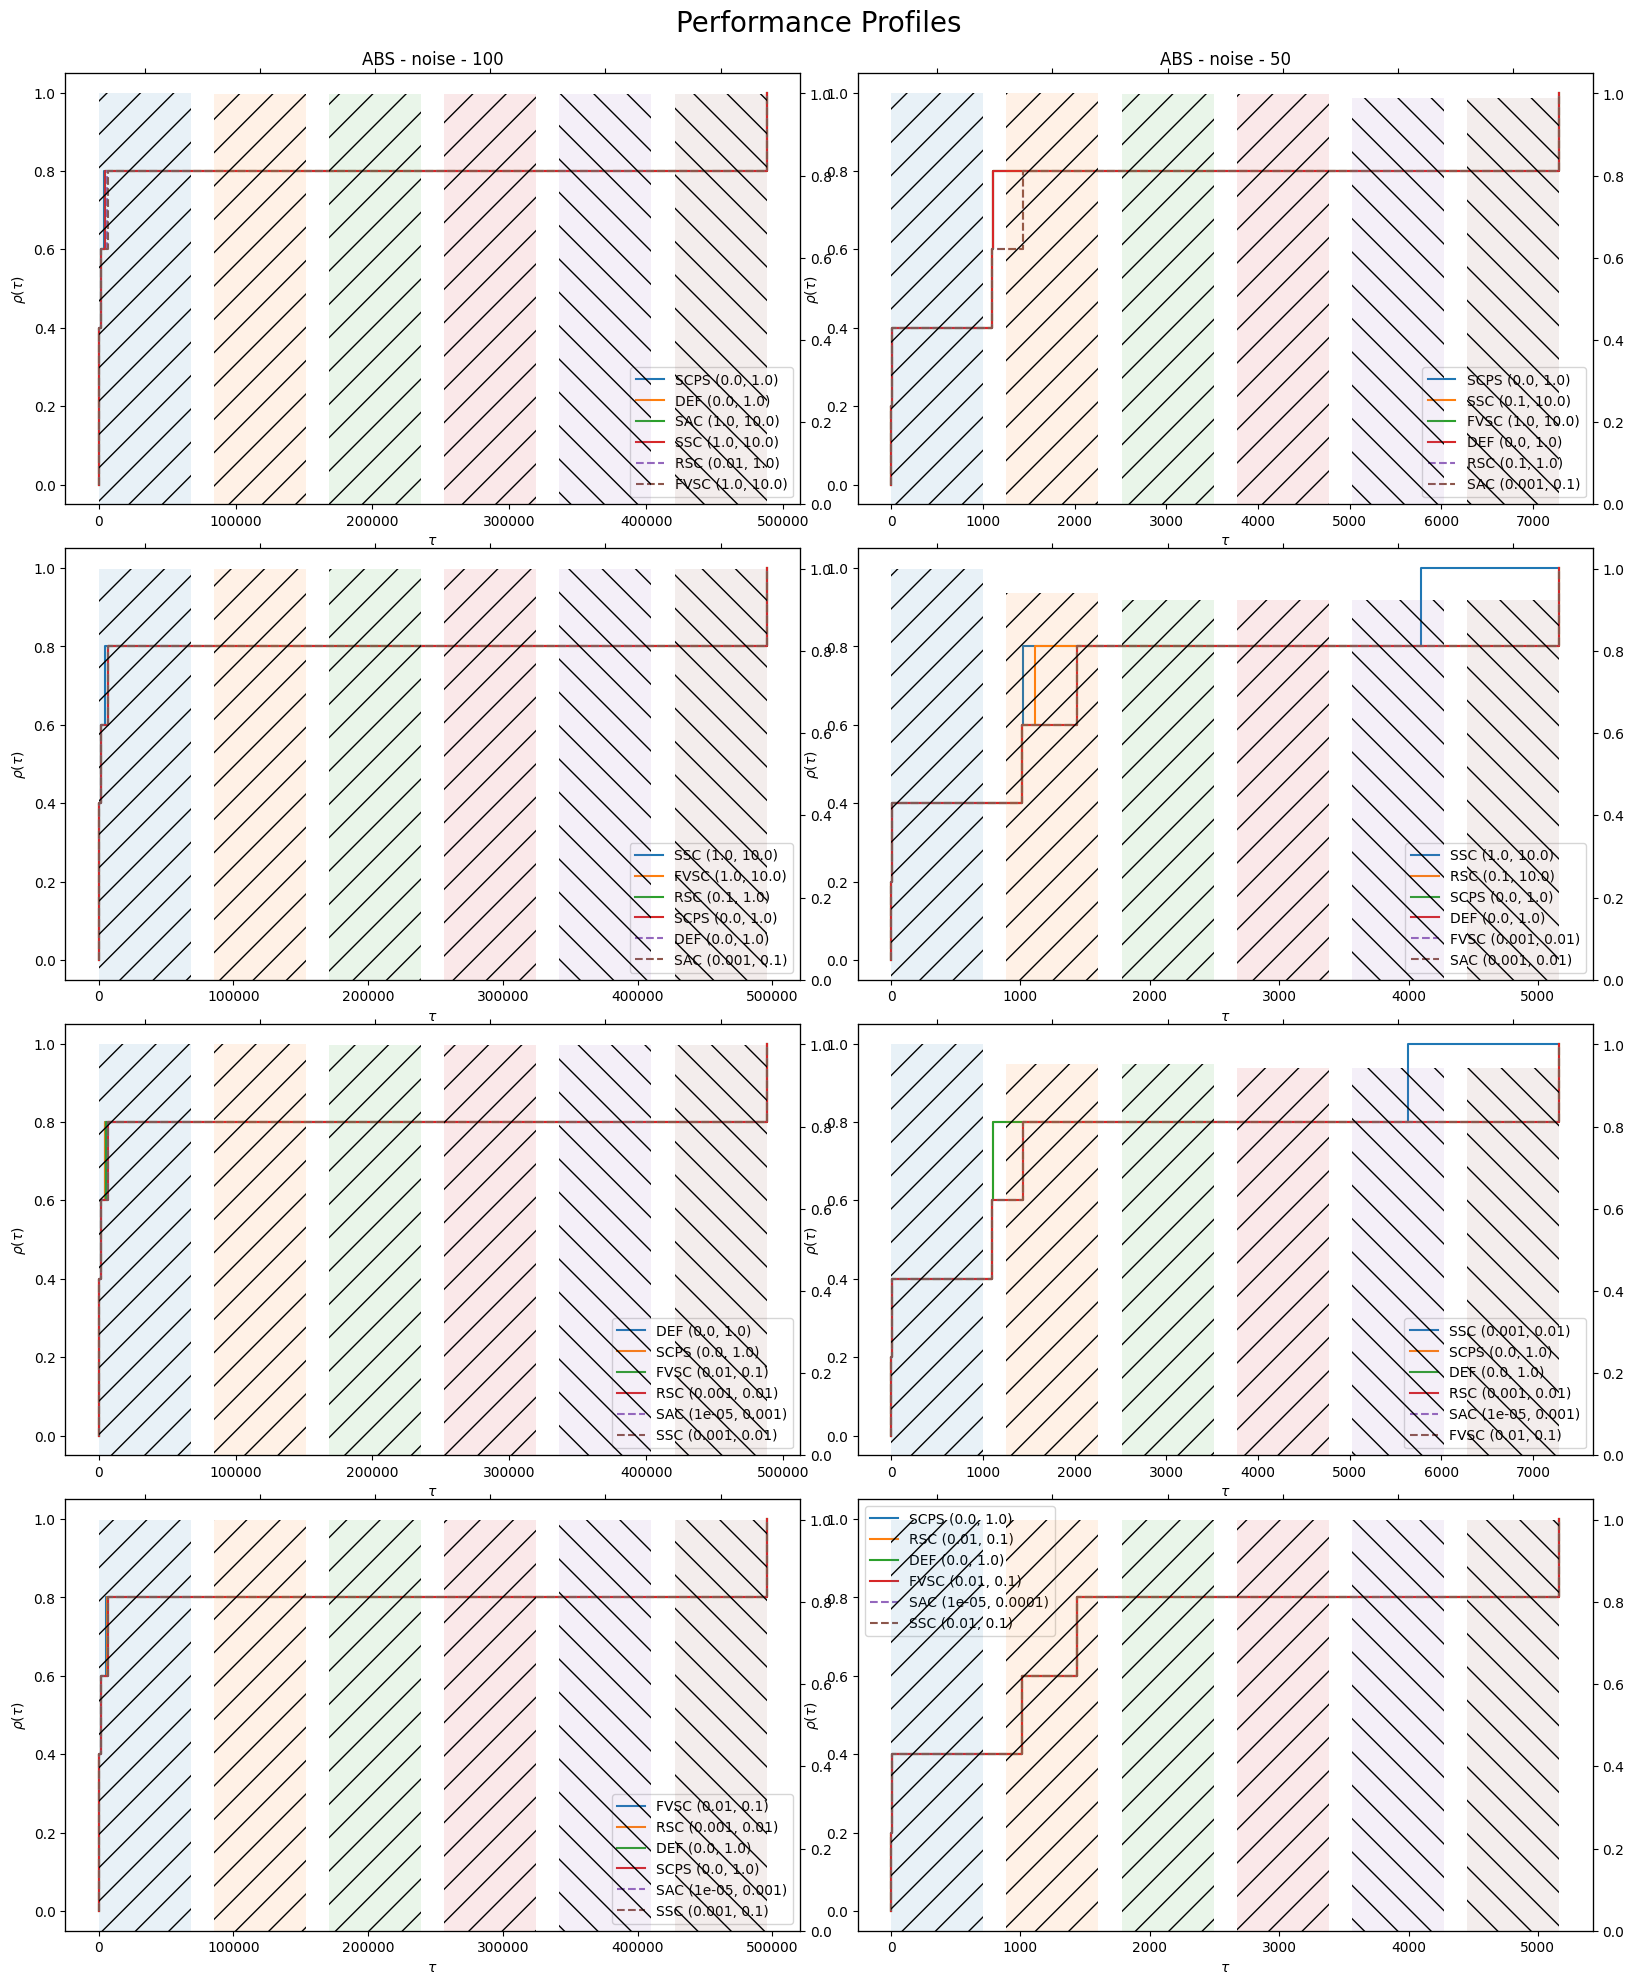

In [52]:
distances = grouped_areas_df.distance.unique()
noise = grouped_areas_df.noise.unique()
amount = grouped_areas_df.amount.unique()

n_rows = len(distances) * len(noise)
n_cols = len(amount)

fig, axs = plt.subplots(n_rows, n_cols, figsize=(n_cols * 8, n_rows * 5))

# Adicionando um título maior à figura
fig.suptitle('Performance Profiles', fontsize=20)

# Ajustando o layout para melhor visualização
fig.tight_layout(rect=[0, 0, 1, 0.98])  # Ajustando o layout para que o título não sobreponha os subplots

for d, distance in enumerate(distances):
    for n, noise in enumerate(noises):
        for a, amount in enumerate(amounts):
            ax  = axs[d * len(distances) + n, a]
            ax_ = ax.twinx().twiny()
            
            problem = grouped_areas_df[
                (grouped_areas_df.distance == distance) &
                (grouped_areas_df.noise == noise) &
                (grouped_areas_df.amount == amount)
            ]
            
            # Adicionando um título para cada coluna
            if d == 0 and n == 0:
                ax.set_title(f'{distance} - {noise} - {amount}', fontsize=12)
            
            resume = {}
            for i, row in problem.iterrows():
                resume[f"{row['variation']} {row['parameters']}"] = pp_dfs[distance][noise][amount][row['variation']][row['parameters']]
            
            resume = pd.DataFrame(resume)
            
            # Gráficos

            vet = []
            names = resume.columns

            for key in names:      
                resume_ = np.array(resume[key])
                resume_ = np.sort(resume_)
                
                h = 1. / len(resume)
                linha = [[1, 0]]

                for i in resume_:
                    linha.append([i, linha[-1][1]])
                    linha.append([i, linha[-1][1] + h])

                linha = np.array(linha).T
                # print(linha)
                vet.append(linha[0,:])
            vet = np.array(vet).T
            maior = np.max(vet)
            maior = [[maior for _ in range(len(names))]]
            vet = np.concatenate([vet, np.array(maior)])
            
            vet = pd.DataFrame(vet)

            vet.columns = names
            vet['h'] = [h*(i//2) for i in range(len(vet))]
            
            # Lista de cores
            colors_styles = plt.cm.tab10([i % 10 for i in range(len(names))])

            # Lista de estilos de linha
            line_styles = ['-', '--', '-.', ':']
            
            # Padrões
            patterns = ['/', '\\', '|', '-', '+', 'x', 'o', 'O', '.', '*']
            
            colors = []
            for l in range(len(line_styles)):
                for color in colors_styles:
                    colors.append([color, line_styles[l], patterns[l]])
            
            # Calcula as áreas
            areas = {}
            for i in range(len(names)):
                areas[names[i]] = np.trapz(vet['h'], vet[names[i]])
            
            max_area = max([x[1] for x in areas.items()])
            
            for i in range(len(names)):
                areas[names[i]] = areas[names[i]]/max_area
                
            areas = dict(sorted(areas.items(), key=lambda item: item[1], reverse=True))
            
            names = list(areas.keys())[:]

            # Gráfico de linhas à esquerda
            for i in range(len(names)):
                ax.plot(vet[names[i]], vet['h'], color=colors[i][0], linestyle=line_styles[(i // len(line_styles)) % len(line_styles)], label = names[i])
                ax_.bar(names[i], areas[names[i]], color=colors[i][0], hatch=patterns[(i // len(line_styles)) % len(line_styles)], alpha=0.1)
            
            ax_.set_xticklabels(["" for i in range(len(names))], fontsize=10, rotation=90)                        
            ax.set_xlabel(fr'$\tau$')
            ax.set_ylabel(fr'$\rho(\tau)$')
            ax.legend()

plt.show()

# Tudo junto

In [53]:
results = results.sort_values(by=["seed", "noise", "amount", "problem"])
# results = results[(results.distance == "ABS") & (results.noise == "noise") & (results.amount == 50)]
results

,seed,time,training,test,validation,model,constants,problem,amount,noise,distance,variation,lower,upper,seed_file
4032,0,1852,6.176322,5.684218,6.457398,f0() = (6.457398299) x1 x2 + sin,f1,f1,100,noise,ABS,RSC,0.1000,10.000,0.hist
4035,0,1569,6.176322,5.684218,6.457398,f0() = (6.457398299) x1 x2 + sin,f1,f1,100,noise,ABS,RSC,0.1000,1.000,0.hist
4038,0,1004,6.176322,5.684218,6.457398,f0() = (6.457398299) x1 x2 + sin,f1,f1,100,noise,ABS,RSC,0.0100,0.100,0.hist
4041,0,1036,6.176322,5.684218,6.457398,f0() = (6.457398299) x1 x2 + sin,f1,f1,100,noise,ABS,RSC,0.0100,10.000,0.hist
4044,0,972,6.176322,5.684218,6.457398,f0() = (6.457398299) x1 x2 + sin,f1,f1,100,noise,ABS,RSC,0.0100,1.000,0.hist
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,2,351,0.242241,0.202480,0.237634,f0() = (0.2376336381) 0.4 exp,f4,f4,50,original,COS,SSC,0.0001,0.100,2.hist
998,2,414,0.242241,0.202480,0.237634,f0() = (0.2376336381) 0.4 exp,f4,f4,50,original,COS,SSC,0.0001,0.010,2.hist
1001,2,453,0.242241,0.202480,0.237634,f0() = (0.2376336381) 0.4 exp,f4,f4,50,original,COS,SSC,0.0001,0.001,2.hist
1004,2,592,0.242241,0.202480,0.237634,f0() = (0.2376336381) 0.4 exp,f4,f4,50,original,COS,SSC,0.0010,0.100,2.hist


In [54]:
results.groupby(["distance"]).size().reset_index(name='contagem').sort_values(by="contagem")

,distance,contagem
0,ABS,2520
1,COS,2520


In [55]:
results[results.variation == "SSC"].groupby(["problem", "amount", "noise", "variation", "distance"]).size().reset_index(name='contagem').sort_values(by="contagem")

,problem,amount,noise,variation,distance,contagem
0,f1,100,noise,SSC,ABS,30
1,f1,100,noise,SSC,COS,30
2,f1,100,original,SSC,ABS,30
3,f1,100,original,SSC,COS,30
4,f1,50,noise,SSC,ABS,30
5,f1,50,noise,SSC,COS,30
6,f1,50,original,SSC,ABS,30
7,f1,50,original,SSC,COS,30
8,f12,100,noise,SSC,ABS,30
9,f12,100,noise,SSC,COS,30


In [56]:
algorithms = results.groupby(["variation", "distance", "lower", "upper", "problem"]).size().reset_index(name='contagem').sort_values(by="contagem")
algorithms

,variation,distance,lower,upper,problem,contagem
408,SSC,COS,0.001,0.01,f3,12
409,SSC,COS,0.001,0.01,f4,12
410,SSC,COS,0.001,0.10,f1,12
411,SSC,COS,0.001,0.10,f12,12
412,SSC,COS,0.001,0.10,f14,12
...,...,...,...,...,...,...
39,FVSC,ABS,0.010,1.00,f4,12
417,SSC,COS,0.010,0.10,f14,12
418,SSC,COS,0.010,0.10,f3,12
419,SSC,COS,0.010,0.10,f4,12


In [57]:
results.columns

Index(['seed', 'time', 'training', 'test', 'validation', 'model', 'constants',
       'problem', 'amount', 'noise', 'distance', 'variation', 'lower', 'upper',
       'seed_file'],
      dtype='object')

In [58]:
problems = results.groupby(["distance", "noise", "amount", "problem", "variation"]).size().reset_index(name='contagem').sort_values(by='contagem')
problems

,distance,noise,amount,problem,variation,contagem
82,ABS,original,100,f3,SCPS,3
84,ABS,original,100,f4,DEF,3
0,ABS,noise,100,f1,DEF,3
4,ABS,noise,100,f1,SCPS,3
6,ABS,noise,100,f12,DEF,3
...,...,...,...,...,...,...
9,ABS,noise,100,f12,SAC,30
11,ABS,noise,100,f12,SSC,30
13,ABS,noise,100,f14,FVSC,30
14,ABS,noise,100,f14,RSC,30


In [59]:
pp_dfs = {}

for i, row in algorithms.iterrows():
    distance = row['distance']
    variation = row['variation']
    lower = row['lower']
    upper = row['upper']

    algorithm_df = results[
        (results.distance == distance) &
        (results.variation == variation) &
        (results.lower == lower) &
        (results.upper == upper)
    ].sort_values(by=["noise", "amount", "problem"])

    algorithm_df = algorithm_df.groupby(["noise", "amount", "problem"])[fit_model].median().reset_index()

    # if len(algorithm_df) == 126:
    pp_dfs[(distance, variation, lower, upper)] = algorithm_df[fit_model].values
        
pp_dfs = pd.DataFrame(pp_dfs, index=algorithm_df.groupby(["noise", "amount", "problem"])[fit_model].median().index)
pp_dfs

COS                                \
                                   SSC                                 
                               0.00100                       0.01000   
                               0.0100         0.1000         0.1000    
noise    amount problem                                                
noise    100    f1            6.176322       6.176322       6.176322   
                f12        1716.447698    1716.447698    1716.447698   
                f14      488033.954200  488033.954200  488033.954200   
                f3         6944.104996    6944.104996    6944.104996   
                f4            0.403972       0.403972       0.403972   
         50     f1            6.296432       6.296432       6.296432   
                f12        1436.186821    1436.186821    1436.186821   
                f14        1101.430274    1101.430274    1101.430274   
                f3         5636.212523    7285.468776    7285.468776   
                f4            0.284826       0.284826       0.284826   
original 100    f1            6.082208       6.082208       6.082208   
                f12        1716.862644    1716.862644    1716.862644   
                f14      495866.863500  495866.863500  495866.863500   
                f3         6738.732844    6738.732844    6738.732844   
                f4            0.302661       0.302661       0.302661   
         50     f1            6.290694       6.290694       6.290694   
                f12        1438.447679    1438.447679    1438.447679   
                f14        1013.616178    1013.616178    1013.616178   
                f3         5164.668760    5164.668760    5164.668760   
                f4            0.240086       0.257591       0.257591   

                                                                      \
                                                                       
                               0.00010                                 
                               0.1000         0.0010         0.0100    
noise    amount problem                                                
noise    100    f1            6.176322       6.176322       6.176322   
                f12        1716.447698    1716.447698    1716.447698   
                f14      488033.954200  488033.954200  488033.954200   
                f3         6944.104996    6944.104996    6944.104996   
                f4            0.403972       0.403972       0.403972   
         50     f1            6.296432       6.296432       6.296432   
                f12        1436.186821    1436.186821    1436.186821   
                f14        1101.430274    1101.430274    1101.430274   
                f3         7285.468776    5636.212523    5636.212523   
                f4            0.284826       0.284826       0.284826   
original 100    f1            6.082208       6.082208       6.082208   
                f12        1716.862644    1716.862644    1716.862644   
                f14      495866.863500  495866.863500  495866.863500   
                f3         6738.732844    6738.732844    6738.732844   
                f4            0.302661       0.302661       0.302661   
         50     f1            6.290694       6.290694       6.290694   
                f12        1438.447679    1438.447679    1438.447679   
                f14        1013.616178    1013.616178    1013.616178   
                f3         5164.668760    5164.668760    5164.668760   
                f4            0.257591       0.257591       0.257591   

                                                                 ABS  \
                                                                FVSC   
                               0.00001                       0.00100   
                               0.0100         0.1000         1.0000    
noise    amount problem                                                
noise    100    f1            6.176322       6.176322       6.176322   
 

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


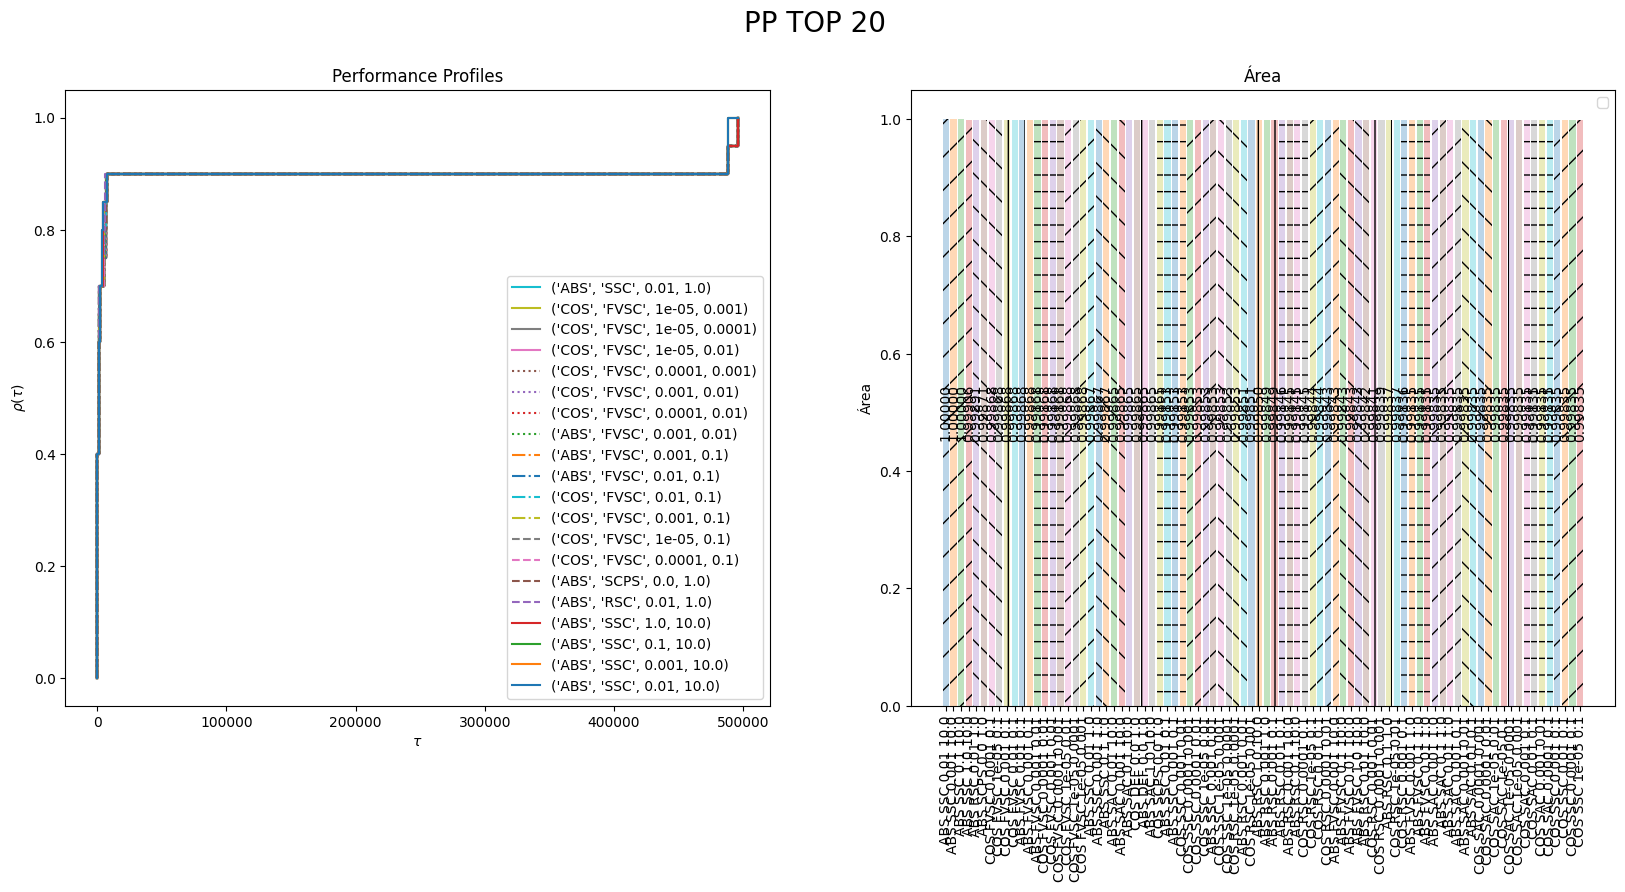

('ABS', 'SSC', 0.01, 10.0) 1.0
('ABS', 'SSC', 0.001, 10.0) 1.0
('ABS', 'SSC', 0.1, 10.0) 0.9999999993781601
('ABS', 'SSC', 1.0, 10.0) 0.9990605553923502
('ABS', 'RSC', 0.01, 1.0) 0.9989063461879907
('ABS', 'SCPS', 0.0, 1.0) 0.9987059232812101
('COS', 'FVSC', 0.0001, 0.1) 0.9986781841661487
('COS', 'FVSC', 1e-05, 0.1) 0.9986781841661487
('COS', 'FVSC', 0.001, 0.1) 0.9986781841661487
('COS', 'FVSC', 0.01, 0.1) 0.9986781841661487
('ABS', 'FVSC', 0.01, 0.1) 0.9986781837361925
('ABS', 'FVSC', 0.001, 0.1) 0.9986781837361925
('ABS', 'FVSC', 0.001, 0.01) 0.9986781837361925
('COS', 'FVSC', 0.0001, 0.01) 0.9986781837361925
('COS', 'FVSC', 0.001, 0.01) 0.9986781837361925
('COS', 'FVSC', 0.0001, 0.001) 0.9986781837361925
('COS', 'FVSC', 1e-05, 0.01) 0.9986781837361925
('COS', 'FVSC', 1e-05, 0.0001) 0.9986781837361925
('COS', 'FVSC', 1e-05, 0.001) 0.9986781837361925
('ABS', 'SSC', 0.01, 1.0) 0.9986719817433862
('ABS', 'SSC', 0.001, 1.0) 0.9986719817433862
('ABS', 'SSC', 0.1, 1.0) 0.9986719391149004

In [60]:
fig, ax = plt.subplots(1, 2, figsize=(20, 8))

ax1, ax2 = ax[0], ax[1]

resume = pp_dfs
# Gráficos

vet = []
names = resume.columns

for key in names:      
    h = 1. / len(resume)
    linha = [[1, 0]]
    resume_ = np.array(resume[key])
    resume_ = np.sort(resume_)

    for i in resume_:
        linha.append([i, linha[-1][1]])
        linha.append([i, linha[-1][1] + h])

    linha = np.array(linha).T
    vet.append(linha[0,:])
vet = np.array(vet).T
maior = np.max(vet)
maior = [[maior for _ in range(len(names))]]
vet = np.concatenate([vet, np.array(maior)])
vet = pd.DataFrame(vet)

vet.columns = names
vet['h'] = [h*(i//2) for i in range(len(vet))]
                
# Lista de cores
colors_styles = plt.cm.tab10([i % 10 for i in range(len(names))])

# Lista de estilos de linha
line_styles = ['-', '--', '-.', ':']

# Padrões
patterns = ['/', '\\', '|', '-', '+', 'x', 'o', 'O', '.', '*']

colors = []
for l in range(len(line_styles)):
    for color in colors_styles:
        colors.append([color, line_styles[l], patterns[l]])

# Calcula as áreas
areas = {}
for i in range(len(names)):
    areas[names[i]] = np.trapz(vet['h'], vet[names[i]])
areas = dict(sorted(areas.items(), key=lambda item: item[1], reverse=True))

max_area = max([x[1] for x in areas.items()])

for i in range(len(names)):
    areas[names[i]] = areas[names[i]]/max_area

names = list(areas.keys())[:]

# Gráfico de barras à direita
for i in range(len(names)):
    name = f"{names[i][0]} {names[i][1]} {names[i][2]} {names[i][3]}"
    ax2.bar(name, areas[names[i]], color=colors[i][0], hatch=patterns[(i // len(line_styles)) % len(line_styles)], alpha=0.3)
    # Adicionando o valor dentro da barra
    height = areas[names[i]]
    ax2.text(
        name,  # Posição x do texto (nome da barra)
        height / 2,  # Posição y do texto (metade da altura da barra)
        '{:.5f}'.format(height),  # Texto (valor da barra)
        ha='center',  # Alinhamento horizontal do texto
        va='center',  # Alinhamento vertical do texto
        color='black',  # Cor do texto
        fontsize=10,  # Tamanho da fonte
        rotation=90
    )
    
ax2.set_title('Área')
ax2.set_ylabel('Área')
# Configurar labels na vertical
ax2.set_xticks(range(len(names)))
ax2.set_xticklabels([f"{names[i][0]} {names[i][1]} {names[i][2]} {names[i][3]}" for i in range(len(names))], fontsize=10, rotation=90)
plt.xticks(rotation=90)

# Gráfico de linhas à esquerda
for i in reversed(range(len(names))):
    ax1.plot(vet[names[i]], vet['h'], color=colors[i][0], linestyle=line_styles[(i // len(line_styles)) % len(line_styles)], label = names[i] if i < 20 else None)
    
ax1.set_title("Performance Profiles")                                      
ax1.set_xlabel(fr'$\tau$')
ax1.set_ylabel(fr'$\rho(\tau)$')
ax1.legend()

plt.legend()

plt.suptitle(f"PP TOP 20", fontsize=20)
# plt.tight_layout(pad=0.8, rect=[0, 0, 1, 0.98])
plt.show()
# plt.savefig(f"pp/{distance} - {noise} - {amount} - {variation}.png")
plt.close()

for area in areas:
    print(area, areas[area])

In [61]:
pp_dfs

COS                                \
                                   SSC                                 
                               0.00100                       0.01000   
                               0.0100         0.1000         0.1000    
noise    amount problem                                                
noise    100    f1            6.176322       6.176322       6.176322   
                f12        1716.447698    1716.447698    1716.447698   
                f14      488033.954200  488033.954200  488033.954200   
                f3         6944.104996    6944.104996    6944.104996   
                f4            0.403972       0.403972       0.403972   
         50     f1            6.296432       6.296432       6.296432   
                f12        1436.186821    1436.186821    1436.186821   
                f14        1101.430274    1101.430274    1101.430274   
                f3         5636.212523    7285.468776    7285.468776   
                f4            0.284826       0.284826       0.284826   
original 100    f1            6.082208       6.082208       6.082208   
                f12        1716.862644    1716.862644    1716.862644   
                f14      495866.863500  495866.863500  495866.863500   
                f3         6738.732844    6738.732844    6738.732844   
                f4            0.302661       0.302661       0.302661   
         50     f1            6.290694       6.290694       6.290694   
                f12        1438.447679    1438.447679    1438.447679   
                f14        1013.616178    1013.616178    1013.616178   
                f3         5164.668760    5164.668760    5164.668760   
                f4            0.240086       0.257591       0.257591   

                                                                      \
                                                                       
                               0.00010                                 
                               0.1000         0.0010         0.0100    
noise    amount problem                                                
noise    100    f1            6.176322       6.176322       6.176322   
                f12        1716.447698    1716.447698    1716.447698   
                f14      488033.954200  488033.954200  488033.954200   
                f3         6944.104996    6944.104996    6944.104996   
                f4            0.403972       0.403972       0.403972   
         50     f1            6.296432       6.296432       6.296432   
                f12        1436.186821    1436.186821    1436.186821   
                f14        1101.430274    1101.430274    1101.430274   
                f3         7285.468776    5636.212523    5636.212523   
                f4            0.284826       0.284826       0.284826   
original 100    f1            6.082208       6.082208       6.082208   
                f12        1716.862644    1716.862644    1716.862644   
                f14      495866.863500  495866.863500  495866.863500   
                f3         6738.732844    6738.732844    6738.732844   
                f4            0.302661       0.302661       0.302661   
         50     f1            6.290694       6.290694       6.290694   
                f12        1438.447679    1438.447679    1438.447679   
                f14        1013.616178    1013.616178    1013.616178   
                f3         5164.668760    5164.668760    5164.668760   
                f4            0.257591       0.257591       0.257591   

                                                                 ABS  \
                                                                FVSC   
                               0.00001                       0.00100   
                               0.0100         0.1000         1.0000    
noise    amount problem                                                
noise    100    f1            6.176322       6.176322       6.176322   
 

In [62]:
count_df = pp_dfs

for i, row in count_df.iterrows():
    # print("problem", i)
    best_value = min(row)
    best_alg = None

    for alg in count_df.columns:
        if row[alg] == best_value:
            count_df.loc[i, alg] = 1
            best_alg = alg
        else:
            count_df.loc[i, alg] = 0

    for alg in count_df.columns:
        if alg != best_alg and row[alg] != best_value:
            ra = results[
                (results.distance == alg[0]) &
                (results.variation == alg[1]) &
                (results.lower == alg[2]) &
                (results.upper == alg[3])
            ].sort_values(by=["noise", "amount", "problem"])[fit_model].values

            rb = results[
                (results.distance == best_alg[0]) &
                (results.variation == best_alg[1]) &
                (results.lower == best_alg[2]) &
                (results.upper == best_alg[3])
            ].sort_values(by=["noise", "amount", "problem"])[fit_model].values

            s, p = scipy.stats.kruskal(ra, rb)

            if p > 0.05:
                count_df.loc[i, alg] = count_df.loc[i, alg] + 1

count_df.loc[("total", "total", "total")] = count_df.sum()

print(sum(count_df.loc[("total", "total", "total")]))

count_df = count_df.T

# Ordenar o DataFrame transposto pelo valor do somatório de forma decrescente
count_df = count_df.sort_values(by=("total", "total", "total"), ascending=False)

# Transpor de volta ao formato original
count_df = count_df.T

count_df

1930.0


ABS                                            \
                           SSC          FVSC          SCPS   FVSC    RSC   
                        0.0010 0.0100 0.1000 0.0010 0.0000 0.1000 0.1000   
                         10.00  10.00  10.00  10.00  1.00   1.00   10.00   
noise    amount problem                                                    
noise    100    f1         1.0    1.0    1.0    1.0    1.0    1.0    1.0   
                f12        1.0    1.0    2.0    2.0    1.0    1.0    2.0   
                f14        2.0    2.0    2.0    2.0    2.0    2.0    2.0   
                f3         2.0    2.0    1.0    1.0    1.0    1.0    1.0   
                f4         1.0    1.0    1.0    1.0    1.0    1.0    1.0   
         50     f1         1.0    1.0    2.0    2.0    2.0    2.0    1.0   
                f12        2.0    2.0    1.0    1.0    1.0    1.0    1.0   
                f14        1.0    1.0    1.0    1.0    1.0    1.0    1.0   
                f3         1.0    1.0    1.0    1.0    1.0    1.0    1.0   
                f4         1.0    1.0    1.0    1.0    1.0    1.0    1.0   
original 100    f1         1.0    1.0    1.0    1.0    1.0    1.0    1.0   
                f12        1.0    1.0    2.0    2.0    1.0    1.0    2.0   
                f14        2.0    2.0    1.0    1.0    1.0    1.0    1.0   
                f3         1.0    1.0    1.0    1.0    1.0    1.0    1.0   
                f4         1.0    1.0    1.0    1.0    2.0    2.0    1.0   
         50     f1         1.0    1.0    2.0    2.0    2.0    2.0    2.0   
                f12        1.0    1.0    1.0    1.0    1.0    1.0    1.0   
                f14        2.0    2.0    2.0    2.0    2.0    2.0    2.0   
                f3         2.0    2.0    1.0    1.0    1.0    1.0    1.0   
                f4         2.0    2.0    1.0    1.0    1.0    1.0    1.0   
total    total  total     27.0   27.0   26.0   26.0   25.0   25.0   25.0   

                                              ...                        COS  \
                          FVSC           RSC  ...   FVSC                FVSC   
                        0.0010 0.0100 0.0100  ... 0.0100 0.0010       0.0001   
                         1.00   10.00  1.00   ...  0.10   0.10  0.01   0.01    
noise    amount problem                       ...                              
noise    100    f1         1.0    1.0    1.0  ...    1.0    1.0   1.0    1.0   
                f12        1.0    1.0    2.0  ...    1.0    1.0   1.0    1.0   
                f14        2.0    2.0    2.0  ...    2.0    2.0   2.0    2.0   
                f3         1.0    1.0    1.0  ...    1.0    1.0   1.0    1.0   
                f4         1.0    1.0    1.0  ...    1.0    1.0   1.0    1.0   
         50     f1         2.0    2.0    1.0  ...    1.0    1.0   1.0    1.0   
                f12        1.0    1.0    1.0  ...    1.0    1.0   1.0    1.0   
                f14        1.0    1.0    1.0  ...    1.0    1.0   1.0    1.0   
                f3         1.0    1.0    1.0  ...    1.0    1.0   1.0    1.0   
                f4         1.0    1.0    1.0  ...    1.0    1.0   1.0    1.0   
original 100    f1         1.0    1.0    1.0  ...    1.0    1.0   1.0    1.0   
                f12        1.0    1.0    2.0  ...    1.0    1.0   1.0    1.0   
                f14        1.0    1.0    1.0  ...    1.0    1.0   1.0    1.0   
                f3         1.0    1.0    1.0  ...    1.0    1.0   1.0    1.0   
                f4         2.0    1.0    1.0  ...    1.0    1.0   1.0    1.0   
         50     f1         2.0    2.0    1.0  ...    1.0    1.0   1.0    1.0   
                f12        1.0    1.0    1.0  ...    1.0    1.0   1.0    1.0   
                f14        2.0    2.0    2.0  ...    2.0    2.0   2.0    2.0   
                f3         1.0    1.0    1.0  ...    1.0    1.0   1.0    1.0   
                f4         1.0    1.0    1.0  ...    1.0    1.0   1.0    1.0   
total    total  total     25.0   24.0   24.0  ... 